# Data Exploration

In [ ]:
# import libraries and mount drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
# Uncomment out below line if drive is not already mounted
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/DSBA6201_EV_Project/complete_FE_data.csv', header=0, encoding='latin')
df.head()

,Model Year,Mfr Name,Division,Carline,Eng Displ,# Cyl,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,Fuel Usage Desc - Conventional Fuel,Annual Fuel1 Cost - Conventional Fuel,EPA Calculated Annual Fuel Cost - Conventional Fuel ----- Annual fuel cost error. Please revise Verify.,Carline Class Desc
0,2015,Honda,Acura,ILX,2.0,4.0,24,35,28,Gasoline (Premium Unleaded Recommended),2050.0,2050.0,Compact Cars
1,2015,Honda,Acura,ILX,2.4,4.0,22,31,25,Gasoline (Premium Unleaded Recommended),2300.0,2300.0,Compact Cars
2,2015,Honda,Acura,TLX,2.4,4.0,24,35,28,Gasoline (Premium Unleaded Recommended),2050.0,2050.0,Compact Cars
3,2015,Honda,Acura,TLX,3.5,6.0,21,34,25,Gasoline (Premium Unleaded Recommended),2300.0,2300.0,Compact Cars
4,2015,Honda,Acura,TLX AWD,3.5,6.0,21,31,25,Gasoline (Premium Unleaded Recommended),2300.0,2300.0,Compact Cars


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 13 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Model Year                                                                                                3504 non-null   int64  
 1   Mfr Name                                                                                                  3504 non-null   object 
 2   Division                                                                                                  3504 non-null   object 
 3   Carline                                                                                                   3504 non-null   object 
 4   Eng Displ                                                                     

In [ ]:
# Rename columns
df.columns = ['yr', 'mfr','div','line','eng','cyl','fe_city','fe_hwy','fe_comb','fuel_usage','fuel_cost','fuel_cost_epa','car_class']

In [ ]:
df.isnull().sum()

yr                 0
mfr                0
div                0
line               0
eng              195
cyl              195
fe_city            0
fe_hwy             0
fe_comb            0
fuel_usage         0
fuel_cost          0
fuel_cost_epa    195
car_class          0
dtype: int64

In [ ]:
print(df['mfr'].isnull().sum() / len(df))

0.0


In [ ]:
df.describe(include=['number'])

,yr,eng,cyl,fe_city,fe_hwy,fe_comb,fuel_cost,fuel_cost_epa
count,3504.000000,3309.000000,3309.000000,3504.000000,3504.000000,3504.000000,3504.000000,3309.000000
mean,2017.887557,2.998821,5.386522,27.156678,34.030251,29.600171,1799.580650,1882.653370
std,1.948648,1.334948,1.674786,22.010203,17.639544,19.993396,629.744477,543.816039
min,2015.000000,1.000000,3.000000,10.000000,14.000000,12.000000,286.587594,600.000000
25%,2016.000000,2.000000,4.000000,18.000000,25.000000,20.000000,1400.000000,1500.000000
50%,2018.000000,2.500000,4.000000,22.000000,30.000000,25.000000,1800.000000,1850.000000
75%,2020.000000,3.600000,6.000000,26.000000,35.000000,30.000000,2200.000000,2200.000000
max,2021.000000,7.000000,12.000000,150.000000,133.000000,142.000000,4050.000000,4050.000000


In [ ]:
df.describe(include=['object'])

,mfr,div,line,fuel_usage,car_class
count,3504,3504,3504,3504,3504
unique,37,49,721,7,11
top,General Motors,BMW,ACCORD,Gasoline (Regular Unleaded Recommended),Midsize Cars
freq,488,346,40,1771,1192


In [ ]:
df['yr'].unique()

array([2015, 2016, 2017, 2018, 2020, 2019, 2021])

In [ ]:
df['mfr'].unique()

array(['Honda', 'Volkswagen Group of', 'BMW', 'General Motors',
       'Ford Motor Company', 'Hyundai', 'Nissan', 'Kia', 'Toyota',
       'MAZDA', 'Mercedes-Benz', 'Mitsubishi Motors Co', 'Subaru',
       'Volvo', 'Quantum Fuel System', 'FCA US LLC',
       'Jaguar Land Rover L', 'SUBARU TECNICA INTE', 'AUDI ', 'AUDI',
       'CHEVROLET', 'FORD', 'HYUNDAI', 'JAGUAR', 'KANDI', 'KIA', 'MINI',
       'NISSAN', 'POLESTAR', 'TESLA', 'VOLKSWAGEN', 'VOLVO', 'FIAT',
       'HONDA', 'SMART', 'MERCEDES-BENZ', 'MITSUBISHI'], dtype=object)

In [ ]:
df['div'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet', 'Ford',
       'Honda', 'HYUNDAI MOTOR COMPANY', 'INFINITI',
       'KIA MOTORS CORPORATION', 'LEXUS', 'MAZDA', 'Mercedes-Benz',
       'Mini', 'Mitsubishi Motors Corporation', 'NISSAN', 'SCION',
       'Subaru', 'TOYOTA', 'Volkswagen',
       'Volvo Cars of North America, LLC', 'Chrysler', 'Dodge', 'Jaguar',
       'Lincoln', 'GMC', 'RAM', 'ALFA ROMEO', 'GENESIS', 'Jeep',
       'SUBARU TECNICA INTERNATIONAL', 'AUDI', 'CHEVROLET', 'FORD',
       'HYUNDAI', 'JAGUAR', 'KANDI', 'KIA', 'MINI', 'POLESTAR', 'TESLA',
       'VOLKSWAGEN', 'VOLVO', 'FIAT', 'HONDA', 'SMART', 'MERCEDES-BENZ',
       'MITSUBISHI'], dtype=object)

In [ ]:
df['line'].unique()
df['line'].value_counts()

ACCORD                          40
Challenger                      35
Elantra                         30
Jetta                           29
CIVIC 4Dr                       28
                                ..
Sonata HYBRID LIMITED            1
Alpina B7 SWB                    1
SMART EQ fortwo convertible      1
ALTIMA 3.5                       1
TESLA Model Y Standard Range     1
Name: line, Length: 721, dtype: int64

In [ ]:
df['fuel_usage'].unique()
df['fuel_usage'].value_counts()

Gasoline (Regular Unleaded Recommended)       1771
Gasoline (Premium Unleaded Recommended)        912
Gasoline (Premium Unleaded Required)           552
Electricity                                    195
Gasoline (Mid Grade Unleaded Recommended)       53
Diesel, ultra low sulfur (15 ppm, maximum)      20
Diesel, low sulfur (500 ppm)                     1
Name: fuel_usage, dtype: int64

In [ ]:
df['car_class'].unique()
df['car_class'].value_counts()

Midsize Cars                   1192
Compact Cars                   1053
Large Cars                      591
Standard Pick-up Trucks 4WD     263
Standard Pick-up Trucks 2WD     210
midsize car                      48
large car                        43
small car                        36
standard SUV                     33
station wagon                    20
small SUV                        15
Name: car_class, dtype: int64

# Data Visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

                     yr       eng       cyl  ...   fe_comb  fuel_cost  fuel_cost_epa
yr             1.000000 -0.007411 -0.019734  ...  0.082230  -0.211372      -0.212377
eng           -0.007411  1.000000  0.934333  ... -0.714939   0.743429       0.743429
cyl           -0.019734  0.934333  1.000000  ... -0.709027   0.747760       0.747760
fe_city        0.089106 -0.662516 -0.659559  ...  0.997071  -0.715652      -0.799608
fe_hwy         0.059887 -0.759570 -0.748448  ...  0.992568  -0.753584      -0.826064
fe_comb        0.082230 -0.714939 -0.709027  ...  1.000000  -0.736507      -0.830895
fuel_cost     -0.211372  0.743429  0.747760  ... -0.736507   1.000000       1.000000
fuel_cost_epa -0.212377  0.743429  0.747760  ... -0.830895   1.000000       1.000000

[8 rows x 8 columns]


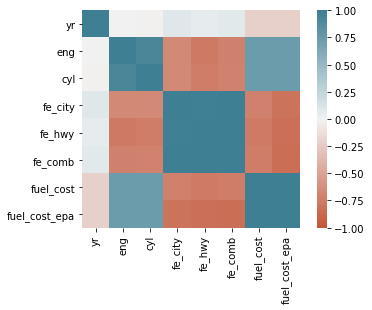

In [ ]:
corr = df.corr()

#heatmap
corr_map = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20,220, n = 200), square = True)

#number representation
print(corr)

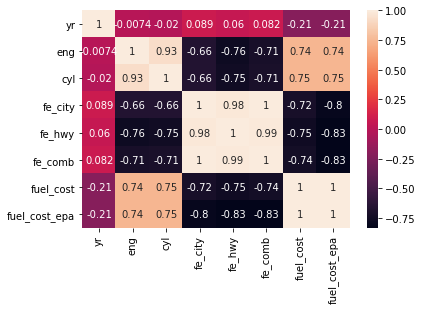

In [ ]:
# a combination of the above two
sns.heatmap(corr, annot= True)
plt.show()

# Shows that the predictor variables have little correlation on Fuel_Cost_EPA (response variable). Letting us know 
#   that our predictors will not skew our results with bias (PLEASE CHECK ME ON THIS) 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



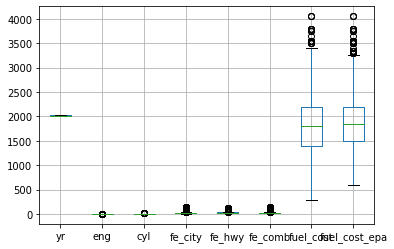

In [ ]:
# Create a Box and Whisker Plot
boxwh = df.boxplot()

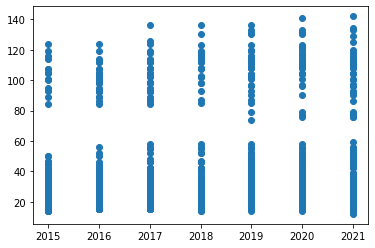

In [ ]:
# Simple scatter plot
x = df['yr']
y = df['fe_comb']
simpscatt = plt.scatter(x , y , marker = 'o')

# Data Pre-Processing

In [ ]:
# Drop and rename columns
df = df.drop(columns = ['fuel_cost','fuel_cost_epa'])
df.head()

,yr,mfr,div,line,eng,cyl,fe_city,fe_hwy,fe_comb,fuel_usage,car_class
0,2015,Honda,Acura,ILX,2.0,4.0,24,35,28,Gasoline (Premium Unleaded Recommended),Compact Cars
1,2015,Honda,Acura,ILX,2.4,4.0,22,31,25,Gasoline (Premium Unleaded Recommended),Compact Cars
2,2015,Honda,Acura,TLX,2.4,4.0,24,35,28,Gasoline (Premium Unleaded Recommended),Compact Cars
3,2015,Honda,Acura,TLX,3.5,6.0,21,34,25,Gasoline (Premium Unleaded Recommended),Compact Cars
4,2015,Honda,Acura,TLX AWD,3.5,6.0,21,31,25,Gasoline (Premium Unleaded Recommended),Compact Cars


In [ ]:
# TO DO REMOVE THIS AFTER UPDATING IN THE DATA ITSELF

# Intitial data cleaning
# Replace null values

df['mfr'].fillna('No manufacturer', inplace = True)
df['div'].fillna('No division', inplace = True)
df['eng'].fillna(0, inplace=True)
df['cyl'].fillna(0, inplace=True)

df.isnull().sum()

yr            0
mfr           0
div           0
line          0
eng           0
cyl           0
fe_city       0
fe_hwy        0
fe_comb       0
fuel_usage    0
car_class     0
dtype: int64

In [ ]:
# Combine some class categories

df['car_class'] = df['car_class'].replace(['large car'], 'Large Cars')
df['car_class'] = df['car_class'].replace(['standard SUV'], 'Large Cars')
df['car_class'] = df['car_class'].replace(['midsize car'], 'Midsize Cars')
df['car_class'] = df['car_class'].replace(['station wagon'], 'Midsize Cars')
df['car_class'] = df['car_class'].replace(['small SUV'], 'Midsize Cars')
df['car_class'] = df['car_class'].replace(['small car'], 'Small Cars')
df['car_class'] = df['car_class'].replace(['Compact Cars'], 'Small Cars')
df['car_class'] = df['car_class'].replace(['Standard Pick-up Trucks 2WD'], 'Trucks')
df['car_class'] = df['car_class'].replace(['Standard Pick-up Trucks 4WD'], 'Trucks')

df['car_class'].unique()
df['car_class'].value_counts()

Midsize Cars    1275
Small Cars      1089
Large Cars       667
Trucks           473
Name: car_class, dtype: int64

In [ ]:
df2_plots = df

# Combining Large, Midsize, & Small Cars into one value of Cars
df2_plots['car_class'] = df2_plots['car_class'].replace(['Large Cars'], 'Cars')
df2_plots['car_class'] = df2_plots['car_class'].replace(['Midsize Cars'], 'Cars')
df2_plots['car_class'] = df2_plots['car_class'].replace(['Small Cars'], 'Cars')

# Combining Large, Midsize, & Small Cars into one value of Cars
df2_plots['fuel_usage'] = df2_plots['fuel_usage'].replace(['Gasoline (Regular Unleaded Recommended)'], 'Gas')
df2_plots['fuel_usage'] = df2_plots['fuel_usage'].replace(['Gasoline (Premium Unleaded Recommended)'], 'Gas')
df2_plots['fuel_usage'] = df2_plots['fuel_usage'].replace(['Gasoline (Premium Unleaded Required)'], 'Gas')
df2_plots['fuel_usage'] = df2_plots['fuel_usage'].replace(['Gasoline (Mid Grade Unleaded Recommended)'], 'Gas')

# Could not find a way to drop a row with the column value = Diesel, so I added them into Gas. Named it df3 so we didnt change df2
df3_plots = df2_plots
df3_plots['fuel_usage'] = df2_plots['fuel_usage'].replace(['Diesel, ultra low sulfur (15 ppm, maximum)'], 'Gas')
df3_plots['fuel_usage'] = df2_plots['fuel_usage'].replace(['Diesel, low sulfur (500 ppm)'], 'Gas')

df2_plots['car_class'].unique()
df2_plots['car_class'].value_counts()
df3_plots['fuel_usage'].unique()
df3_plots['fuel_usage'].value_counts()


Gas            3309
Electricity     195
Name: fuel_usage, dtype: int64

Splitting Data Electricity, Gas(Cars & Trucks) for Box & Whisker Chart


In [ ]:
df3_plots.head()

,yr,mfr,div,line,eng,cyl,fe_city,fe_hwy,fe_comb,fuel_usage,car_class
0,2015,Honda,Acura,ILX,2.0,4.0,24,35,28,Gas,Cars
1,2015,Honda,Acura,ILX,2.4,4.0,22,31,25,Gas,Cars
2,2015,Honda,Acura,TLX,2.4,4.0,24,35,28,Gas,Cars
3,2015,Honda,Acura,TLX,3.5,6.0,21,34,25,Gas,Cars
4,2015,Honda,Acura,TLX AWD,3.5,6.0,21,31,25,Gas,Cars


In [ ]:
# Splitting the fuel_usage into EV and GAS (using df3_plots)
# EV dataframe
EVdf = df3_plots[ (df3_plots.fuel_usage == 'Electricity')]

EVdf.head()
#EVdf.value_counts()


,yr,mfr,div,line,eng,cyl,fe_city,fe_hwy,fe_comb,fuel_usage,car_class
3309,2021,AUDI,AUDI,AUDI e-tron,0.0,0.0,78,77,78,Electricity,Cars
3310,2021,AUDI,AUDI,AUDI e-tron Sportback,0.0,0.0,76,78,77,Electricity,Cars
3311,2021,BMW,BMW,BMW i3s,0.0,0.0,124,102,113,Electricity,Cars
3312,2021,CHEVROLET,CHEVROLET,CHEVROLET Bolt EV,0.0,0.0,127,108,118,Electricity,Cars
3313,2021,FORD,FORD,FORD Mustang Mach-E,0.0,0.0,105,93,100,Electricity,Cars


In [ ]:
# GAS dataframe
Gasdf = df3_plots[ (df3_plots.fuel_usage == 'Gas')]
Gasdf.head()
#Gasdf.value_counts()



,yr,mfr,div,line,eng,cyl,fe_city,fe_hwy,fe_comb,fuel_usage,car_class
0,2015,Honda,Acura,ILX,2.0,4.0,24,35,28,Gas,Cars
1,2015,Honda,Acura,ILX,2.4,4.0,22,31,25,Gas,Cars
2,2015,Honda,Acura,TLX,2.4,4.0,24,35,28,Gas,Cars
3,2015,Honda,Acura,TLX,3.5,6.0,21,34,25,Gas,Cars
4,2015,Honda,Acura,TLX AWD,3.5,6.0,21,31,25,Gas,Cars


In [ ]:
# Split Gas dataframe into Cars & Trucks

Car_Gasdf = Gasdf[Gasdf.car_class == 'Cars']

#Car_Gasdf = Gasdf[ (Gasdf.class == 'Cars')]
Truck_Gasdf = Gasdf[Gasdf.car_class == 'Trucks']

Car_Gasdf.head()
Car_Gasdf.value_counts()
Truck_Gasdf.head()
Truck_Gasdf.value_counts()

yr    mfr                 div        line                          eng  cyl  fe_city  fe_hwy  fe_comb  fuel_usage  car_class
2015  FCA US LLC          RAM        1500 4X2                      3.6  6.0  17       25      20       Gas         Trucks       2
      Nissan              NISSAN     TITAN 2WD                     5.6  8.0  13       18      15       Gas         Trucks       2
      General Motors      Chevrolet  K15 SILVERADO 4WD             5.3  8.0  16       22      18       Gas         Trucks       2
2018  General Motors      Chevrolet  K15 SILVERADO 4WD             5.3  8.0  16       22      18       Gas         Trucks       2
2015  General Motors      GMC        C15 SIERRA 2WD                5.3  8.0  16       23      19       Gas         Trucks       2
                                                                                                                               ..
2019  Toyota              TOYOTA     TUNDRA 4WD FFV                5.7  8.0  13       17      1

Box & Whisker Chart by year

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



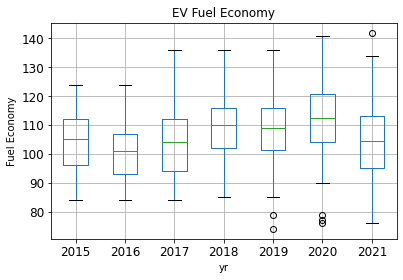

In [ ]:
# Create a box & whisker chart of All Electricity Cars for their fuel economy (fe_comb) by year

"""EVbox = EVdf.boxplot(column = 'fe_comb', by= 'yr', grid=True, fontsize=12)
EVbox.set_title('EV Fuel Economy')
EVbox.suptitle('')"""

EVdf.boxplot(column = 'fe_comb', by= 'yr', grid=True, fontsize=12)
plt.title('EV Fuel Economy')
plt.suptitle('')
plt.ylabel('Fuel Economy')
plt.show()
#Tried adding a title but couldnt get rid of the one they provided below

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



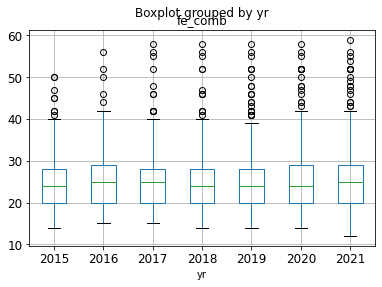

In [ ]:
# Create a box & whisker chart of All Gas Vehicles for their fuel economy (fe_comb) by year

Gasbox = Gasdf.boxplot(column = 'fe_comb', by= 'yr', grid=True, fontsize=12)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



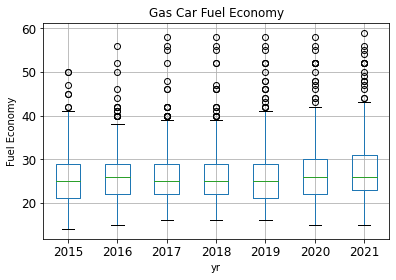

In [ ]:
# Create a box & whisker chart of Gasoline Cars for their fuel economy (fe_comb) by year

#Car_box = Car_Gasdf.boxplot(column = 'fe_comb', by= 'yr', grid=True, fontsize=12)


Car_Gasdf.boxplot(column = 'fe_comb', by= 'yr', grid=True, fontsize=12)
plt.title('Gas Car Fuel Economy')
plt.suptitle('')
plt.ylabel('Fuel Economy')
plt.show()
#Tried adding a title but couldnt get rid of the one they provided below

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



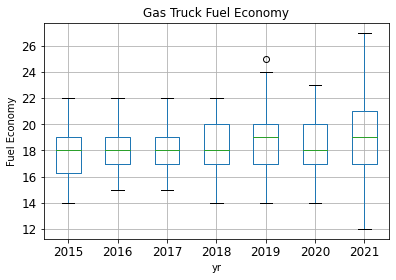

In [ ]:
# Create a box & whisker chart of Gasoline Cars for their fuel economy (fe_comb) by year

#Truck_box = Truck_Gasdf.boxplot(column = 'fe_comb', by= 'yr', grid=True, fontsize=12)

Truck_Gasdf.boxplot(column = 'fe_comb', by= 'yr', grid=True, fontsize=12)
plt.title('Gas Truck Fuel Economy')
plt.suptitle('')
plt.ylabel('Fuel Economy')
plt.show()
#Tried adding a title but couldnt get rid of the one they provided below

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



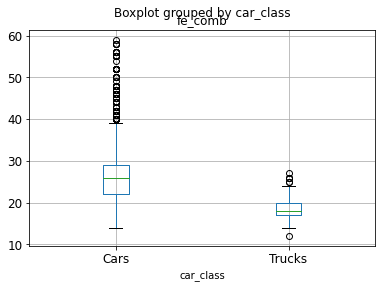

In [ ]:
# Create a box & whisker chart of All Gas Cars for their fuel economy (fe_comb) by year

GasCarbox = Gasdf.boxplot(column = 'fe_comb', by= 'car_class', grid=True, fontsize=12)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



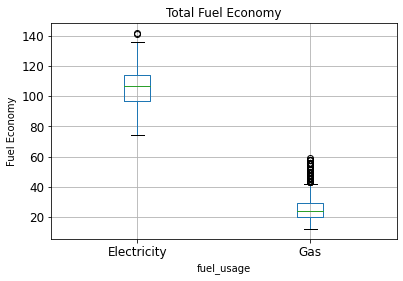

In [ ]:
# FE comb to Y and Year to X and have Charts that focus on Trucks, EV, Cars

# Create a Box and Whisker Plot for combined fuel economy
#boxwh = df2_plots.boxplot(column = 'fe_comb', by='fuel_usage',)

df2_plots.boxplot(column = 'fe_comb', by= 'fuel_usage', grid=True, fontsize=12)
plt.title('Total Fuel Economy')
plt.suptitle('')
plt.ylabel('Fuel Economy')
plt.show()

In [ ]:
# Simple scatter plot

scat_truck_df = df.car_class =="Trucks"


x = df['yr']
y = df['fe_comb']
colors = {'Trucks':'red', 'Midsize Cars':'green', 'Small Cars':'blue', 'Large Cars':'yellow'}
#simpscatt = plt.scatter(x , y , marker = 'o', c=df['car_class'].map(colors))

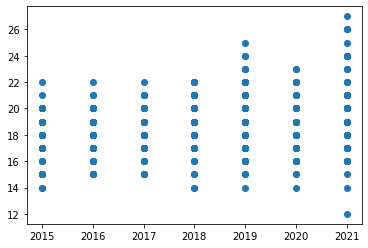

In [ ]:
###  Trying to breakdown scatter plots into Fuel_usage ; then class (for gas) ; group by year

scat_truck_df = df[df.car_class == "Trucks"]


x = scat_truck_df['yr']
y = scat_truck_df['fe_comb']
colors = {'Trucks':'red', 'Midsize Cars':'green', 'Small Cars':'blue', 'Large Cars':'yellow'}
simpscatt = plt.scatter(x , y , marker = 'o')

#scat_truck_df.head(10)
#df.head(10)

In [ ]:
# data tables / histograms
df4 = df2_plots[['car_class','fe_comb']].groupby('car_class').mean()
df4

,fe_comb
car_class,
Cars,31.326295
Trucks,18.539112


Text(0, 0.5, 'Average Fuel Economy')

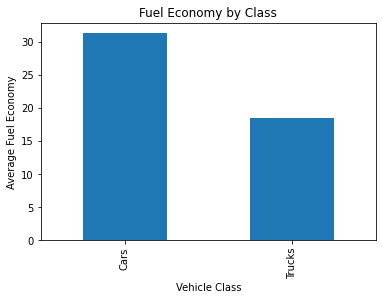

In [ ]:
df4['fe_comb'].plot.bar()
plt.title("Fuel Economy by Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Average Fuel Economy")

In [ ]:
# data tables / histograms
df5 = df2_plots[['fuel_usage','fe_comb']].groupby('fuel_usage').mean()
df5

,fe_comb
fuel_usage,
Electricity,106.225641
Gas,25.084618


Text(0, 0.5, 'Average Fuel Economy')

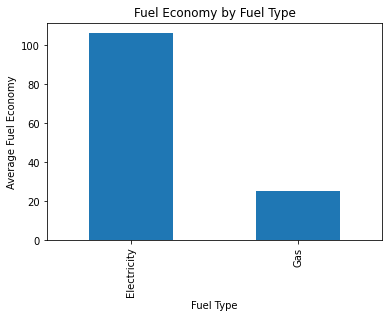

In [ ]:
df5['fe_comb'].plot.bar()
plt.title("Fuel Economy by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Fuel Economy")

In [ ]:
#TODO
# One-Hot-Encode class, other variables?

from sklearn.preprocessing import OneHotEncoder
one_hot_df = pd.get_dummies(df['car_class'], prefix='car_class', prefix_sep='_')
one_hot_df.head()
encoded_df = df.join(one_hot_df)
mfg_one_hot = pd.get_dummies(df['div'],prefix='div', prefix_sep='_')
encoded_df = encoded_df.join(mfg_one_hot)
fuel_one_hot = pd.get_dummies(df['fuel_usage'],prefix='fuel_usage', prefix_sep='_')
encoded_df = encoded_df.join(fuel_one_hot)

e_df = encoded_df.replace({2015: 0, 2016:1, 2017:2, 2018:3, 2019:4, 2020:5, 2021:6})
# encoded_df
e_df

,yr,mfr,div,line,eng,cyl,fe_city,fe_hwy,fe_comb,fuel_usage,car_class,car_class_Cars,car_class_Trucks,div_ALFA ROMEO,div_AUDI,div_Acura,div_Audi,div_BMW,div_Buick,div_CHEVROLET,div_Cadillac,div_Chevrolet,div_Chrysler,div_Dodge,div_FIAT,div_FORD,div_Ford,div_GENESIS,div_GMC,div_HONDA,div_HYUNDAI,div_HYUNDAI MOTOR COMPANY,div_Honda,div_INFINITI,div_JAGUAR,div_Jaguar,div_Jeep,div_KANDI,div_KIA,div_KIA MOTORS CORPORATION,div_LEXUS,div_Lincoln,div_MAZDA,div_MERCEDES-BENZ,div_MINI,div_MITSUBISHI,div_Mercedes-Benz,div_Mini,div_Mitsubishi Motors Corporation,div_NISSAN,div_POLESTAR,div_RAM,div_SCION,div_SMART,div_SUBARU TECNICA INTERNATIONAL,div_Subaru,div_TESLA,div_TOYOTA,div_VOLKSWAGEN,div_VOLVO,div_Volkswagen,"div_Volvo Cars of North America, LLC",fuel_usage_Electricity,fuel_usage_Gas
0,0,Honda,Acura,ILX,2.0,4.0,24,35,28,Gas,Cars,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,Honda,Acura,ILX,2.4,4.0,22,31,25,Gas,Cars,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,Honda,Acura,TLX,2.4,4.0,24,35,28,Gas,Cars,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,Honda,Acura,TLX,3.5,6.0,21,34,25,Gas,Cars,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,Honda,Acura,TLX AWD,3.5,6.0,21,31,25,Gas,Cars,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,0,TESLA,TESLA,TESLA Model S,0.0,0.0,88,90,89,Electricity,Cars,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3500,0,TESLA,TESLA,TESLA Model S,0.0,0.0,94,97,95,Electricity,Cars,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3501,0,TESLA,TESLA,TESLA Model S AWD,0.0,0.0,89,98,93,Electricity,Cars,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3502,0,TESLA,TESLA,TESLA Model S AWD,0.0,0.0,101,102,101,Electricity,Cars,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
#TODO
# One-Hot-Encode class, other variables?

from sklearn.preprocessing import OneHotEncoder
one_hot_df = pd.get_dummies(Gasdf['car_class'], prefix='car_class', prefix_sep='_')
one_hot_df.head()
gas_encoded_df = Gasdf.join(one_hot_df)
mfg_one_hot = pd.get_dummies(Gasdf['div'],prefix='div', prefix_sep='_')
gas_encoded_df = gas_encoded_df.join(mfg_one_hot)
fuel_one_hot = pd.get_dummies(Gasdf['fuel_usage'],prefix='fuel_usage', prefix_sep='_')
gas_encoded_df = gas_encoded_df.join(fuel_one_hot)

gas_e_df = gas_encoded_df.replace({2015: 0, 2016:1, 2017:2, 2018:3, 2019:4, 2020:5, 2021:6})



#print(gas_encoded_df)

In [ ]:
# Set y and x
y = e_df['fe_comb']
X = e_df.drop(columns = ['fe_comb', 'fuel_usage', 'fe_city', 'fe_hwy', 'mfr', 'div', 'line', 'car_class'])
X.head()
y_gas = gas_e_df['fe_comb']
X_gas = gas_e_df.drop(columns = ['fe_comb', 'fuel_usage', 'fe_city', 'fe_hwy', 'mfr', 'div', 'line', 'car_class'])

headings = []
for col in X_gas.columns:
  headings.append(col)

X_gas.head()


,yr,eng,cyl,car_class_Cars,car_class_Trucks,div_ALFA ROMEO,div_Acura,div_Audi,div_BMW,div_Buick,div_Cadillac,div_Chevrolet,div_Chrysler,div_Dodge,div_Ford,div_GENESIS,div_GMC,div_HYUNDAI MOTOR COMPANY,div_Honda,div_INFINITI,div_Jaguar,div_Jeep,div_KIA MOTORS CORPORATION,div_LEXUS,div_Lincoln,div_MAZDA,div_Mercedes-Benz,div_Mini,div_Mitsubishi Motors Corporation,div_NISSAN,div_RAM,div_SCION,div_SUBARU TECNICA INTERNATIONAL,div_Subaru,div_TOYOTA,div_Volkswagen,"div_Volvo Cars of North America, LLC",fuel_usage_Gas
0,0,2.0,4.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,2.4,4.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,2.4,4.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,3.5,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,3.5,6.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Scale the input features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

print('X_scaled=\n', X)
print('mean(X_scaled)=', X.mean(axis=0))
print('std(X_scaled)=', X.std(axis=0))

X_scaled=
 [[-1.48203716 -0.5667142  -0.53200665 ... -0.11785113 -0.24275541
   0.24275541]
 [-1.48203716 -0.29423414 -0.53200665 ... -0.11785113 -0.24275541
   0.24275541]
 [-1.48203716 -0.29423414 -0.53200665 ... -0.11785113 -0.24275541
   0.24275541]
 ...
 [-1.48203716 -1.92911452 -2.49014878 ... -0.11785113  4.11937262
  -4.11937262]
 [-1.48203716 -1.92911452 -2.49014878 ... -0.11785113  4.11937262
  -4.11937262]
 [-1.48203716 -1.92911452 -2.49014878 ... -0.11785113  4.11937262
  -4.11937262]]
mean(X_scaled)= [ 6.48897476e-17 -8.92234029e-17  2.43336553e-16 -8.11121844e-18
 -5.27229199e-17  0.00000000e+00 -1.62224369e-17  5.82993826e-17
 -2.43336553e-17  0.00000000e+00 -2.02780461e-17 -4.05560922e-18
  4.86673107e-17 -7.70565752e-17 -4.46117014e-17 -8.11121844e-18
 -4.05560922e-18  1.62224369e-17  3.24448738e-17  0.00000000e+00
  6.69175522e-17  1.82502415e-17  4.05560922e-18  4.46117014e-17
 -3.85282876e-17  7.70565752e-17  1.82502415e-17 -1.01390231e-17
  8.11121844e-18  1.115292

In [ ]:
# Scale the input features

scaler = StandardScaler()
scaler.fit(X_gas)
X_gas = scaler.transform(X_gas)

print('X_scaled=\n', X_gas)
print('mean(X_scaled)=', X_gas.mean(axis=0))
print('std(X_scaled)=', X_gas.std(axis=0))

X_scaled=
 [[-1.46742209 -0.74832277 -0.82800487 ... -0.18803376 -0.12132358
   0.        ]
 [-1.46742209 -0.44864045 -0.82800487 ... -0.18803376 -0.12132358
   0.        ]
 [-1.46742209 -0.44864045 -0.82800487 ... -0.18803376 -0.12132358
   0.        ]
 ...
 [ 1.61719391  2.02373864  1.5607206  ... -0.18803376 -0.12132358
   0.        ]
 [ 1.61719391  2.39834153  1.5607206  ... -0.18803376 -0.12132358
   0.        ]
 [ 1.61719391  2.02373864  1.5607206  ... -0.18803376 -0.12132358
   0.        ]]
mean(X_scaled)= [ 1.37427425e-16  8.15975339e-17 -4.29460705e-18 -8.58921409e-17
  8.58921409e-17  2.36203388e-17  4.29460705e-18 -8.58921409e-18
 -6.87137127e-17  0.00000000e+00 -5.79771951e-17  6.44191057e-18
  0.00000000e+00 -3.00622493e-17 -1.28838211e-16  0.00000000e+00
  3.43568564e-17 -9.66286585e-17  4.29460705e-18 -2.36203388e-17
  3.00622493e-17  0.00000000e+00 -4.72406775e-17  3.22095528e-17
  5.15352846e-17  6.44191057e-18 -9.23340515e-17 -1.71784282e-17
  5.79771951e-17 -1.717842

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

X_gas_train, X_gas_test, y_gas_train, y_gas_test = train_test_split(X_gas, y_gas, test_size=.33)
X_gas_train.shape, y_gas_train.shape
X_gas_test.shape, y_gas_test.shape

((1092, 38), (1092,))

#Modeling

In [ ]:
# Build the linear regression
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

lg = linear_model.LinearRegression(fit_intercept = True)
lg.fit(X_train,y_train)
print('wO = ', lg.intercept_)
print('w1 = ', lg.coef_)

lg_gas = linear_model.LinearRegression(fit_intercept = True)
lg_gas.fit(X_gas_train,y_gas_train)
print('wO_gas = ', lg_gas.intercept_)
print('w1_gas = ', lg_gas.coef_)

wO =  3827677805855.509
w1 =  [ 4.05873384e-01 -3.45496628e+00 -1.21510235e+00 -1.21003208e+14
 -1.21003208e+14  7.84721048e+12  4.05866499e+12  1.41137121e+13
  2.11424893e+13  3.58561206e+13  1.35332070e+13  5.36680757e+12
  2.18587331e+13  2.93409880e+13  1.35332070e+13  2.33784539e+13
  4.53707711e+12  6.08364736e+12  3.07087600e+13  1.55928817e+13
  2.02062828e+13  3.51540908e+12  5.73653824e+12  2.57519701e+13
  2.34595200e+13  1.79527531e+13  3.51540908e+12  1.75083972e+13
  4.96940869e+12  2.03020202e+12  6.41180990e+12  2.28014783e+13
  2.20336225e+13  1.53352486e+13  2.03021071e+13  3.51540908e+12
  2.87072939e+12  2.87072939e+12  2.78839442e+13  2.07737502e+13
  1.24487362e+13  2.17706805e+13  2.03020202e+12  1.62178005e+13
  4.96940869e+12  6.08364736e+12  2.28575703e+14  1.54646397e+13
  1.99156893e+13  2.73536298e+13  3.51540908e+12  2.03020202e+12
  2.12335351e+13  1.39709736e+13 -2.50378077e+13 -2.50378077e+13]
wO_gas =  -2137174620.3108265
w1_gas =  [ 1.36933566e-01 -3

In [ ]:
# Lasso
l1 = LassoCV(cv=10, n_alphas=100, eps=1e-2, tol=.1)
l1.fit(X_train, y_train)
print('alpha = ', l1.alpha_) 
print('intercept = ', l1.intercept_)
print('coef = ', l1.coef_)
print('')

l1_gas = LassoCV(cv=10, n_alphas=100, eps=1e-2, tol=.1)
l1_gas.fit(X_gas_train, y_gas_train)
print('alpha = ', l1_gas.alpha_) 
print('intercept = ', l1_gas.intercept_)
print('coef = ', l1_gas.coef_)

alpha =  0.19252003311319318
intercept =  29.596194298621985
coef =  [ 9.97791695e-02 -1.77283214e+00 -3.50735097e+00  6.45074400e-01
 -2.49429451e-16 -0.00000000e+00 -1.38573290e-03 -0.00000000e+00
 -5.20038297e-02  0.00000000e+00 -9.15490177e-02  1.36438768e+00
 -3.31635958e-01  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.03630961e+00  8.92501364e-01 -0.00000000e+00 -1.48391936e-01
  0.00000000e+00  7.62381442e-01  2.13137873e+00  3.96433247e-01
  6.79726709e-01 -0.00000000e+00 -0.00000000e+00 -8.96924799e-02
 -0.00000000e+00  1.16801669e-01  1.30732752e+00  0.00000000e+00
  8.13646329e-02 -7.34603135e-02  1.63443491e-01  0.00000000e+00
  5.05743079e-01  4.77857514e-01 -0.00000000e+00 -2.82640835e-01
  3.87182182e-02  5.42175869e-01  4.93424890e-02  0.00000000e+00
 -0.00000000e+00  1.09246816e+00 -0.00000000e+00 -1.62550857e-01
  3.57768314e+00  1.24491756e+00  5.80646490e-01 -0.00000000e+00
 -0.00000000e+00 -1.49931626e-01  1.10324387e+01 -9.67646900e-15]

alpha =  0.04874365

In [ ]:
# Ridge CV
l2 = RidgeCV(alphas=[0.1, 1.0, 10.0])
l2.fit(X_train, y_train)
#print('alpha = ', l2.alpha_) 
print('coef = ', l2.coef_)

l2_gas = RidgeCV(alphas=[0.1, 1.0, 10.0])
l2_gas.fit(X_gas_train, y_gas_train)
#print('alpha = ', l2.alpha_) 
print('coef = ', l2_gas.coef_)

coef =  [ 4.02038976e-01 -2.97329031e+00 -1.68674406e+00  7.57763338e-01
 -7.57763338e-01 -1.81311524e-01 -1.23493487e+00 -1.06675975e-02
 -3.54390908e-01 -4.49285158e-01 -2.40580266e-01  2.61607028e-01
 -5.43082097e-01  4.15224161e-01 -7.84543327e-02  5.07145119e-03
  2.42184965e-02 -4.99015083e-01  9.48069749e-02 -4.05508198e-01
  4.46464971e-01  4.18653002e-02  7.98532234e-01  5.83326659e-01
  8.31323470e-01 -5.42495245e-02 -1.07825224e+00 -3.17765928e-01
  8.98241184e-03 -2.89387727e-01 -1.78791010e-01  3.80937735e-02
  1.70451045e-01 -2.80148777e-01  4.02108684e-01 -8.20977086e-01
 -1.20946668e-01 -3.55714268e-03 -2.58902901e-01 -4.31779046e-01
  2.50562573e-01  3.02673404e-01 -3.56759605e-01  3.50679049e-01
  2.30830072e-02 -2.90215401e-01  4.96803644e-28 -3.43797119e-01
 -1.40915711e+00  1.50603748e+00 -1.44892789e-01 -5.75718209e-01
 -5.68929043e-02 -3.04654324e-01  8.78807783e+00 -8.78807783e+00]
coef =  [ 1.37603231e-01 -3.11821071e+00 -9.70472055e-01  8.15408461e-01
 -8.1540

#Model Evaluation

In [ ]:
# Calculate Linear Regression - training RMSE and testing RMSE

lg_y_pred_train = lg.predict(X_train)
lg_train_RMSE = mean_squared_error(y_train, lg_y_pred_train)
print('training RMSE = ', lg_train_RMSE)

lg_y_pred_test = lg.predict(X_test)
lg_test_RMSE = mean_squared_error(y_test.to_numpy(), lg_y_pred_test)
print('testing RMSE = ', lg_test_RMSE)

X_test

training RMSE =  20.802855705371755
testing RMSE =  1.5547679660633103e+29


array([[-0.96878768,  1.27252622,  1.42613548, ..., -0.11785113,
        -0.24275541,  0.24275541],
       [-1.48203716, -0.5667142 , -0.53200665, ..., -0.11785113,
        -0.24275541,  0.24275541],
       [ 0.05771127, -0.5667142 , -0.53200665, ..., -0.11785113,
        -0.24275541,  0.24275541],
       ...,
       [-0.96878768,  2.29432645,  1.42613548, ..., -0.11785113,
        -0.24275541,  0.24275541],
       [ 1.5974597 , -0.90731428, -0.53200665, ..., -0.11785113,
        -0.24275541,  0.24275541],
       [-0.96878768,  1.68124631,  1.42613548, ..., -0.11785113,
        -0.24275541,  0.24275541]])

In [ ]:
# Calculate Linear Regression - GAS ONLY - training RMSE and testing RMSE

lg_y_pred_train = lg_gas.predict(X_gas_train)
lg_train_RMSE = mean_squared_error(y_gas_train, lg_y_pred_train)
print('Gas training RMSE = ', lg_train_RMSE)

lg_y_pred_test = lg_gas.predict(X_gas_test)
lg_test_RMSE = mean_squared_error(y_gas_test.to_numpy(), lg_y_pred_test)
print('Gas testing RMSE = ', lg_test_RMSE)

Gas training RMSE =  15.871893869562554
Gas testing RMSE =  4.579846501999267e+22


In [ ]:
# Calculate Lasso (best alpha) - training RMSE and average RMSE

l1_y_pred_train = l1.predict(X_train)
l1_train_RMSE = mean_squared_error(y_train, l1_y_pred_train)
print('training RMSE = ', l1_train_RMSE)

means_MSE = l1.mse_path_.mean()
SEs_MSE = l1.mse_path_.std()/np.sqrt(l1.mse_path_.shape[0])
print('average RMSE = ', means_MSE)
print('SEs RMSE = ', SEs_MSE)

training RMSE =  27.21975709911826
average RMSE =  76.50169037484446
SEs RMSE =  8.993078950268885


In [ ]:
# Calculate Lasso (best alpha) - GAS ONLY - training RMSE and average RMSE

l1_y_pred_train = l1_gas.predict(X_gas_train)
l1_train_RMSE = mean_squared_error(y_gas_train, l1_y_pred_train)
print('training RMSE = ', l1_train_RMSE)

means_MSE = l1_gas.mse_path_.mean()
SEs_MSE = l1_gas.mse_path_.std()/np.sqrt(l1_gas.mse_path_.shape[0])
print('average RMSE = ', means_MSE)
print('SEs RMSE = ', SEs_MSE)

training RMSE =  16.146401762380357
average RMSE =  22.05834637086011
SEs RMSE =  0.7929939949567392


In [ ]:
# Calculate Lasso (best alpha) - testing RMSE

l1_y_pred_test = l1.predict(X_test)
l1_test_RMSE = mean_squared_error(y_test, l1_y_pred_test)
print('testing RMSE = ', l1_test_RMSE)

testing RMSE =  27.24732751483276


In [ ]:
# Calculate Lasso (best alpha) - GAS ONLY - testing RMSE

l1_y_pred_test = l1_gas.predict(X_gas_test)
l1_test_RMSE = mean_squared_error(y_gas_test, l1_y_pred_test)
print('testing RMSE = ', l1_test_RMSE)

testing RMSE =  14.213441473216315


In [ ]:
# Calculate Ridge - training RMSE and average RMSE

l2_y_pred_train = l2.predict(X_train)
l2_train_RMSE = mean_squared_error(y_train, l2_y_pred_train)
print('training RMSE = ', l2_train_RMSE)

#means_MSE = l2.mse_path_.mean()
#SEs_MSE = l2.mse_path_.std()/np.sqrt(l2.mse_path_.shape[0])
#print('average RMSE = ', means_MSE)
#print('SEs RMSE = ', SEs_MSE)

training RMSE =  20.74059436910784


In [ ]:
# Calculate Ridge - testing RMSE

l2_y_pred_test = l2.predict(X_test)
l2_test_RMSE = mean_squared_error(y_test, l2_y_pred_test)
print('testing RMSE = ', l2_test_RMSE)

testing RMSE =  21.148590411545783


In [ ]:
# Calculate Ridge - GAS ONLY - training RMSE and average RMSE

l2_y_pred_train = l2_gas.predict(X_gas_train)
l2_train_RMSE = mean_squared_error(y_gas_train, l2_y_pred_train)
print('training RMSE = ', l2_train_RMSE)

#means_MSE = l2.mse_path_.mean()
#SEs_MSE = l2.mse_path_.std()/np.sqrt(l2.mse_path_.shape[0])
#print('average RMSE = ', means_MSE)
#print('SEs RMSE = ', SEs_MSE)

training RMSE =  15.873183676458556


In [ ]:
# Calculate Ridge - GAS ONLY - testing RMSE

l2_y_pred_test = l2_gas.predict(X_gas_test)
l2_test_RMSE = mean_squared_error(y_gas_test, l2_y_pred_test)
print('testing RMSE = ', l2_test_RMSE)

testing RMSE =  13.836757480247895


In [ ]:
# predictions
# df of 2024 Ford 3.5L 6 cylinder gas Truck
from pandas import DataFrame
truck = [9,	3.5,	6,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1]
truck_21 = [5,	3.5,	6,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1]
truck_df = DataFrame(truck).transpose()
truck_21_df = DataFrame(truck_21).transpose()
truck_df = scaler.transform(truck_df)
truck_21_df = scaler.transform(truck_21_df)
#truck_df
lg_pred = lg_gas.predict(truck_df)
ridge_pred = l2_gas.predict(truck_df)
lasso_pred = l1_gas.predict(truck_df)

print(lg_pred)
print(ridge_pred)
print(lasso_pred)
print()

lg21_pred = lg_gas.predict(truck_21_df)
ridge21_pred = l2_gas.predict(truck_21_df)
lasso21_pred = l1_gas.predict(truck_21_df)
print(lg21_pred)
print(ridge21_pred)
print(lasso21_pred)
#l2_test_RMSE = mean_squared_error(y_gas_test, l2_y_pred_test)
#print('testing RMSE = ', l2_test_RMSE)

[24.56123447]
[24.58594074]
[22.95759188]

[24.27998447]
[24.30297199]
[22.92833371]


EV intercept:  103.60438821993445 EV Slope:  [0.80270997]


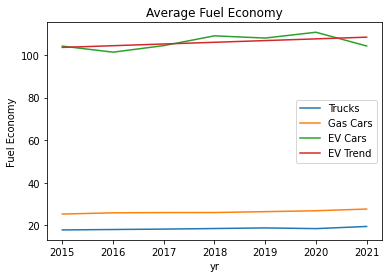

In [ ]:
# Line plot of average fuel economy year over year

#Car_Gasdf
#Truck_Gasdf
#EVdf



c_avg = Car_Gasdf.groupby(['yr']).mean()
t_avg = Truck_Gasdf.groupby(['yr']).mean()
e_avg = EVdf.groupby(['yr']).mean()



years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
X = np.array([0,1,2,3,4,5,6]).reshape(-1,1)
e_y = np.array(e_avg['fe_comb'].tolist())

x_test = np.array([0,1,2,3,4,5,6]).reshape(-1,1)

e_model = LinearRegression()
e_model.fit(X, e_y)
e_y_pred = e_model.predict(x_test)

a = t_avg['fe_comb'].plot.line()
c_avg['fe_comb'].plot.line()
e_avg['fe_comb'].plot.line()
a.plot(years, e_y_pred)

a.set_title('Average Fuel Economy')
a.legend(['Trucks', 'Gas Cars', 'EV Cars', 'EV Trend'])
a.set_ylabel('Fuel Economy')

print('EV intercept: ', e_model.intercept_, 'EV Slope: ', e_model.coef_)

# EV fuel economy improving by .802 mpg per year

Car intercept:  25.257516707984042 Car Slope:  [0.33714356]
Truck intercept:  17.76516149944462 Truck Slope:  [0.22412681]


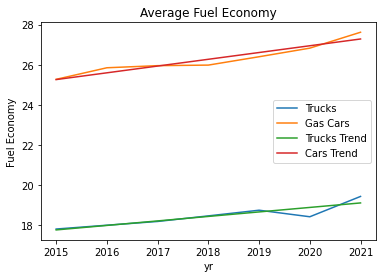

In [ ]:
# Line plot of average fuel economy year over year
from sklearn.linear_model import LinearRegression
#Car_Gasdf
#Truck_Gasdf
#EVdf


years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
c_avg = Car_Gasdf.groupby(['yr']).mean()
t_avg = Truck_Gasdf.groupby(['yr']).mean()
c_avg['fe_comb']
type(t_avg['fe_comb'])

X = np.array([0,1,2,3,4,5,6]).reshape(-1,1)
y = np.array(c_avg['fe_comb'].tolist())
t_y = np.array(t_avg['fe_comb'].tolist())

x_test = np.array([0,1,2,3,4,5,6]).reshape(-1,1)

c_model = LinearRegression()
c_model.fit(X, y)
c_y_pred = c_model.predict(x_test)

t_model = LinearRegression()
t_model.fit(X, t_y)
t_y_pred = t_model.predict(x_test)



a = t_avg['fe_comb'].plot.line()
c_avg['fe_comb'].plot.line()
a.plot(years,t_y_pred)
a.plot(years, c_y_pred)



a.set_title('Average Fuel Economy')
a.legend(['Trucks', 'Gas Cars', 'Trucks Trend', 'Cars Trend'])
a.set_ylabel('Fuel Economy')

t_y_p = t_model.predict(np.array([7,9]).reshape(-1,1))

c_y_p = c_model.predict(np.array([7,9]).reshape(-1,1))

print('Car intercept: ', c_model.intercept_, 'Car Slope: ', c_model.coef_)
print('Truck intercept: ', t_model.intercept_, 'Truck Slope: ', t_model.coef_)


# Gas car fuel economy increasing at .337 mpg per year
# Gas truck fuel economy increasing at .224 mpg per year

Intercept:  17.76516149944462 
Slope:  [0.22412681]


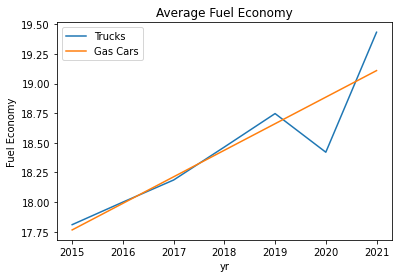

In [ ]:
# Line plot of average fuel economy year over year
from sklearn.linear_model import LinearRegression
#Car_Gasdf
#Truck_Gasdf
#EVdf


years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
c_avg = Car_Gasdf.groupby(['yr']).mean()
t_avg = Truck_Gasdf.groupby(['yr']).mean()
c_avg['fe_comb']
type(t_avg['fe_comb'])

X = np.array([0,1,2,3,4,5,6]).reshape(-1,1)
y = np.array(c_avg['fe_comb'].tolist())
t_y = np.array(t_avg['fe_comb'].tolist())

x_test = np.array([0,1,2,3,4,5,6]).reshape(-1,1)

t_model = LinearRegression()
t_model.fit(X, t_y)
t_y_pred = t_model.predict(x_test)



a = t_avg['fe_comb'].plot.line()
a.plot(years,t_y_pred)


a.set_title('Average Fuel Economy')
a.legend(['Trucks', 'Gas Cars', 'Trucks Trend', 'Cars Trend'])
a.set_ylabel('Fuel Economy')

t_y_p = t_model.predict(np.array([7,9]).reshape(-1,1))

c_y_p = c_model.predict(np.array([7,9]).reshape(-1,1))


print('Intercept: ', t_model.intercept_, '\nSlope: ', t_model.coef_)


# Gas car fuel economy increasing at .337 mpg per year
# Gas truck fuel economy increasing at .224 mpg per year

Difference intercept:  4.0982527402257585 Difference Slope:  [-0.02018437]


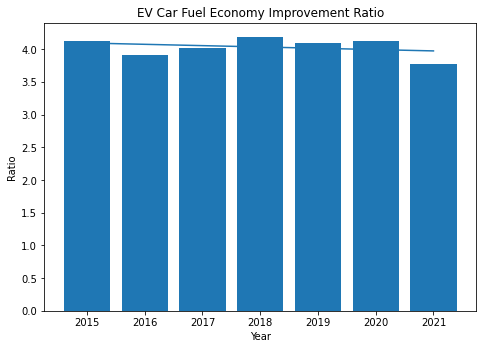

In [ ]:
# Percentage increase in fuel economy of cars

car_list = c_avg['fe_comb'].tolist()
e_list = e_avg['fe_comb'].tolist()
t_list = t_avg['fe_comb'].tolist()
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

diff_list = []
for i in range(0,7):
  diff_list.append(e_list[i]/car_list[i])

diff_list
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(years, diff_list)
ax.set_title('EV Car Fuel Economy Improvement Ratio')
ax.set_xlabel('Year')
ax.set_ylabel('Ratio')

y = np.array(diff_list)

X = np.array([0,1,2,3,4,5,6]).reshape(-1,1)

x_test = np.array([0,1,2,3,4,5,6]).reshape(-1,1)

d_model = LinearRegression()
d_model.fit(X, y)
d_y_pred = d_model.predict(x_test)

print('Difference intercept: ', d_model.intercept_, 'Difference Slope: ', d_model.coef_)

ax.plot(years, d_y_pred)

#Trend shows gasoline cars catching up by ~2% per year, essentially flat
#EVs have on average 300% fuel economy improvement vs their gas counterparts



Text(0, 0.5, 'Fuel Economy')

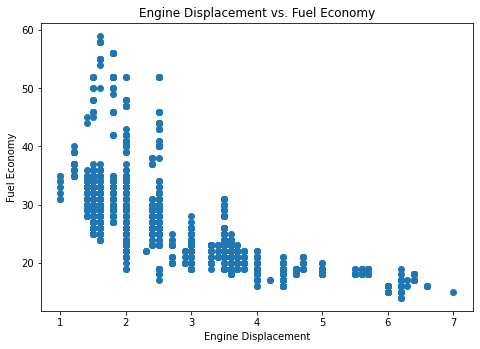

In [ ]:
fig2 = plt.figure()
b = fig2.add_axes([0,0,1,1])
b.scatter(Car_Gasdf['eng'], Car_Gasdf['fe_comb'])
b.set_title('Engine Displacement vs. Fuel Economy')
b.set_xlabel('Engine Displacement')
b.set_ylabel('Fuel Economy')

Text(0, 0.5, 'Fuel Economy')

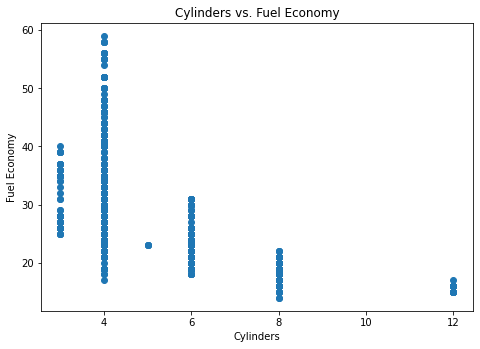

In [ ]:
fig2 = plt.figure()
b = fig2.add_axes([0,0,1,1])
b.scatter(Car_Gasdf['cyl'], Car_Gasdf['fe_comb'])
b.set_title('Cylinders vs. Fuel Economy')
b.set_xlabel('Cylinders')
b.set_ylabel('Fuel Economy')

In [ ]:
#fuel economy variance and standard deviation for EVs

from statistics import variance, stdev

v = EVdf['fe_comb'].tolist()
print('Variance: ',variance(v))
print('Standard Deviation: ', stdev(v))

Variance:  200.35088554057626
Standard Deviation:  14.154535864540959
